In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [124]:
dating_clean = pd.read_csv('/home/amybirdee/hobby_projects/dating_site/dating_clean.csv', delimiter = ',')

In [125]:
dating_clean.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75,-1,transportation,...,"south san francisco, california","doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,white,70,80000,hospitality / travel,...,"oakland, california","doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,no response given,graduated from masters program,no response given,68,-1,no response given,...,"san francisco, california",no response given,straight,has cats,no response given,m,pisces but it doesn't matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,no response given,working on college/university,white,71,20000,student,...,"berkeley, california",doesn't want kids,straight,likes cats,no response given,m,pisces,no,"english, german (poorly)",single
4,29,athletic,no response given,socially,never,graduated from college/university,"asian, black, other",66,-1,artistic / musical / writer,...,"san francisco, california",no response given,straight,likes dogs and likes cats,no response given,m,aquarius,no,english,single


In [126]:
#dropping columns that won't be used in the model
dating_clean = dating_clean.drop(['body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity', 'income', 'job',\
                                  'last_online', 'location', 'offspring', 'pets', 'religion','sign', 'orientation', \
                                  'speaks', 'status', 'smokes'], axis = 1)

In [127]:
dating_clean.head()

,age,height,sex
0,22,75,m
1,35,70,m
2,38,68,m
3,23,71,m
4,29,66,m


In [128]:
#defining the scaler
scaler = MinMaxScaler()

In [129]:
#scaling the numerical columns for model
dating_clean[['age', 'height']] = scaler.fit_transform(dating_clean[['age', 'height']])

In [130]:
dating_clean.head()

,age,height,sex
0,0.043478,0.787234,m
1,0.184783,0.734043,m
2,0.217391,0.712766,m
3,0.054348,0.744681,m
4,0.119565,0.691489,m


In [131]:
#using pd.get_dummies on categorical data
dating_encoded = pd.get_dummies(dating_clean, columns = ['sex'], drop_first = True)
dating_encoded.head()

,age,height,sex_m
0,0.043478,0.787234,1
1,0.184783,0.734043,1
2,0.217391,0.712766,1
3,0.054348,0.744681,1
4,0.119565,0.691489,1


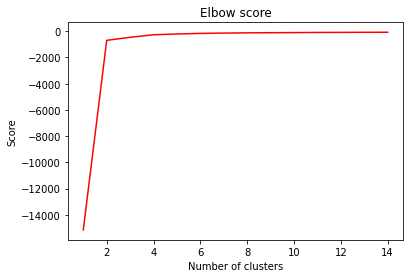

In [132]:
#create 15 clusters - K = 15
k = range (1, 15)

#instantiate and fit KMeans for clusters 1-15
kmeans = [KMeans(n_clusters = i) for i in k]
score = [kmeans[i].fit(dating_encoded).score(dating_encoded) for i in range(len(kmeans))]

#plot the elbow method
pl.plot(k, score, color = 'red')
pl.xlabel('Number of clusters')
pl.ylabel('Score')
pl.title('Elbow score')
pl.show()

In [133]:
#choosing 2 clusters as that's when the curve starts to flatten
cluster = KMeans(n_clusters = 2)

#predict the cluster for all profiles
dating_encoded['cluster'] = cluster.fit_predict(dating_encoded)
cluster.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [134]:
dating_encoded.head()

,age,height,sex_m,cluster
0,0.043478,0.787234,1,0
1,0.184783,0.734043,1,0
2,0.217391,0.712766,1,0
3,0.054348,0.744681,1,0
4,0.119565,0.691489,1,0


In [135]:
#creating a new dataframe which excludes the cluster column so this column won't be included in the principle componenet\
#analysis
excl_cluster = dating_encoded.drop('cluster', axis = 1)

In [136]:
#performing PCA (princliple componenet analysis) to reduce the dimensions so we can visually see cluster segments. 
#This will create a 2-dimensional picture
pca = PCA(n_components = 2)
dating_encoded['x'] = pca.fit_transform(excl_cluster)[:,0]
dating_encoded['y'] = pca.fit_transform(excl_cluster)[:,1]
dating_encoded.head()

,age,height,sex_m,cluster,x,y
0,0.043478,0.787234,1,0,-0.406745,-0.108589
1,0.184783,0.734043,1,0,-0.402433,0.032559
2,0.217391,0.712766,1,0,-0.400925,0.065106
3,0.054348,0.744681,1,0,-0.404223,-0.097840
4,0.119565,0.691489,1,0,-0.400602,-0.032776


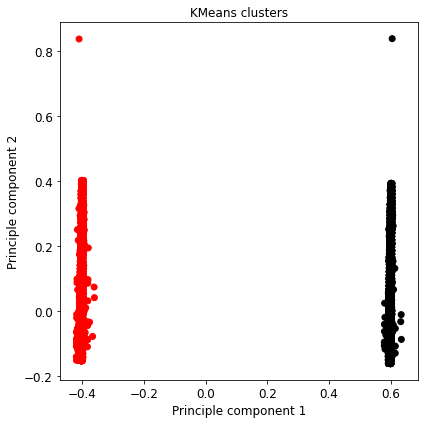

In [163]:
#plotting the clusters
Kmeans_colors = ['red' if cluster == 0 else 'black' for cluster in cluster.labels_]

fig = plt.figure(figsize = (6, 6))
plt.scatter(x = 'x', y = 'y', data = dating_encoded, color = Kmeans_colors)
plt.xlabel('Principle component 1', fontsize = 12)
plt.ylabel('Principle component 2', fontsize = 12)
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.title('KMeans clusters', fontsize = 12)
plt.tight_layout()
plt.savefig('kmeans_clusters')

In [142]:
#extracting the cluster data
dating_cluster = dating_encoded[['cluster']]
dating_cluster.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [151]:
#merging dataframes based on index
merged = dating_clean.merge(dating_cluster, left_index = True, right_index = True)
merged.head()

,age,height,sex,cluster
0,0.043478,0.787234,m,0
1,0.184783,0.734043,m,0
2,0.217391,0.712766,m,0
3,0.054348,0.744681,m,0
4,0.119565,0.691489,m,0


In [159]:
#grouping by clusters - the model created its clusters by sex - all males are in cluster 0 and all females in cluster 1
cluster_group = merged.groupby(['cluster', 'sex']).size()
cluster_group

cluster  sex
0        m      35826
1        f      24117
dtype: int64